In [1]:
library(ctsem)
library(dplyr)
library(plyr)
library(ICC)
library(rmcorr)
library(Rcpp)

Warning message:
"le package 'ctsem' a été compilé avec la version R 4.1.3"
Le chargement a nécessité le package : Rcpp

Warning message:
"le package 'Rcpp' a été compilé avec la version R 4.1.2"
ctsem also changes in time, for manual run ctDocs(), for blog see https://cdriver.netlify.app/, for citation info run citation('ctsem'), for original OpenMx functionality install.packages('ctsemOMX'), and for discussion https://github.com/cdriveraus/ctsem/discussions

Warning message in doTryCatch(return(expr), name, parentenv, handler):
"The following important packages for ctsem are out of date: rstan"
Warning message:
"le package 'dplyr' a été compilé avec la version R 4.1.2"

Attachement du package : 'dplyr'


Les objets suivants sont masqués depuis 'package:stats':

    filter, lag


Les objets suivants sont masqués depuis 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"le package 'plyr' a été compilé avec la version R 4.1.2"
----------------------------------

In [2]:
setwd("G:/VPHI/Welfare/2- Research Projects/Camille Montalcini/Origins.GS/DataOutput/TrackingSystem/EXP2_")

# Download data

In [3]:
path_save = file.path('LongformatModels')
dir.create(path_save)
df = read.csv('df_longformatALL.csv', header = TRUE, sep = ",")
df$HenID = as.factor(df$HenID)   
df$ExperimentID = as.factor(df$ExperimentID)   
#tme is for now week of age
summary(df)
print(dim(df))
head(df)
#describe(df)

Warning message in dir.create(path_save):
"'LongformatModels' existe déjà"


     HAID                    HenID            id         MonthInstudy  
 Length:2228        EXP3_hen_101:  12   Min.   :  1.0   Min.   :0.000  
 Class :character   EXP3_hen_103:  12   1st Qu.:113.8   1st Qu.:0.820  
 Mode  :character   EXP3_hen_104:  12   Median :220.0   Median :3.120  
                    EXP3_hen_105:  12   Mean   :211.0   Mean   :3.511  
                    EXP3_hen_106:  12   3rd Qu.:320.2   3rd Qu.:5.420  
                    EXP3_hen_109:  12   Max.   :372.0   Max.   :9.500  
                    (Other)     :2156                                  
     DOAHA           IsOFH        ExperimentID  Is_relocated      Is_exp1      
 Min.   :148.0   Min.   :0.0000   Exp1:798     Min.   :0.000   Min.   :0.0000  
 1st Qu.:173.0   1st Qu.:0.0000   Exp2:796     1st Qu.:0.000   1st Qu.:0.0000  
 Median :243.0   Median :0.0000   Exp3:634     Median :0.000   Median :0.0000  
 Mean   :254.8   Mean   :0.1854                Mean   :0.175   Mean   :0.3582  
 3rd Qu.:313.0   3rd Qu.

[1] 2228   23


,HAID,HenID,id,MonthInstudy,DOAHA,IsOFH,ExperimentID,Is_relocated,Is_exp1,Is_exp2,...,meanDOAmvt,PropZ5,VTDperhour,unevenness,severity,gap,weight,proptime_2_Zone,proptime_5_Zone,mid_cum_Z4_h_Morning
,<chr>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<int>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>
1,created,EXP2_hen_1,1,0.00,148,0,Exp2,1,0,1,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,HA1,EXP2_hen_1,1,0.85,174,0,Exp2,1,0,1,...,170,0.1429359,3.680272,0.4956481,0,0,1691.7,NA,NA,NA
3,HA2,EXP2_hen_1,1,3.16,244,0,Exp2,1,0,1,...,240,0.1195238,5.030612,0.4865883,0,0,1722.2,NA,NA,NA
4,HA3,EXP2_hen_1,1,5.23,307,0,Exp2,1,0,1,...,303,0.1299773,5.112245,0.3923037,1,0,1655.2,NA,NA,NA
5,HA4,EXP2_hen_1,1,7.99,391,0,Exp2,1,0,1,...,387,0.1178005,3.336735,0.2613006,18,0,1663.7,NA,NA,NA
6,created,EXP2_hen_10,2,0.00,148,0,Exp2,1,0,1,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [4]:
unique(df$HAID)

[1] "created" "HA1"     "HA2"     "HA3"     "HA4"     "HA5"     "HA1A"   
 [8] "HA2A"    "HA3A"    "HA4A"    "HA5A"    "HA6A"    "HA7A"    "HA8A"   
[15] "HA9A"    "HA10A"   "HA11A"   "HA1B"    "HA2B"    "HA3B"    "HA4B"   
[22] "HA5B"    "HA6B"    "HA7B"    "HA8B"    "HA9B"    "HA11B"   "HA10B"

In [5]:
colnames(df)

[1] "HAID"                 "HenID"                "id"                  
 [4] "MonthInstudy"         "DOAHA"                "IsOFH"               
 [7] "ExperimentID"         "Is_relocated"         "Is_exp1"             
[10] "Is_exp2"              "Is_exp3"              "early_death"         
[13] "time2event"           "meanDOAmvt"           "PropZ5"              
[16] "VTDperhour"           "unevenness"           "severity"            
[19] "gap"                  "weight"               "proptime_2_Zone"     
[22] "proptime_5_Zone"      "mid_cum_Z4_h_Morning"

#repeated measures correlations #TODO once all good: make sure its bootstrap!
v1 = rmcorr(HenID, severity, VTDperhour, data = df, CIs="bootstrap")
v2 = rmcorr(HenID, severity, proptime_2_Zone, data = df, CIs="bootstrap")
v3 = rmcorr(HenID, severity, proptime_5_Zone, data = df,CIs="bootstrap") #bstrap.out=T,

v1
plot(v1)

v2
plot(v2)

v3
plot(v3)

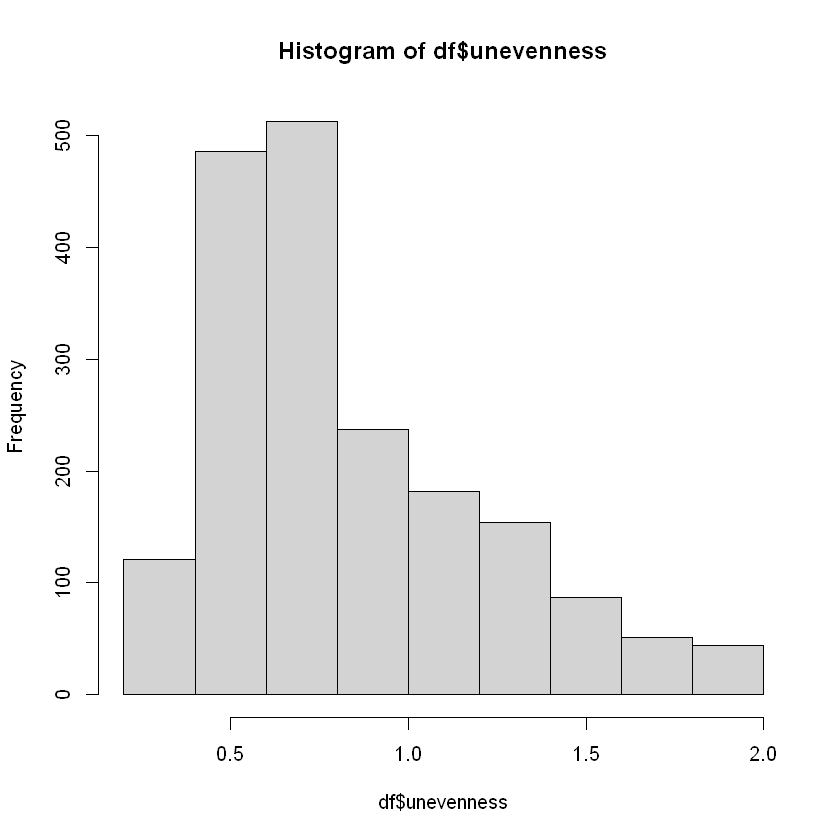

In [6]:
#TODO once all good: add R if we want
hist(df$unevenness)

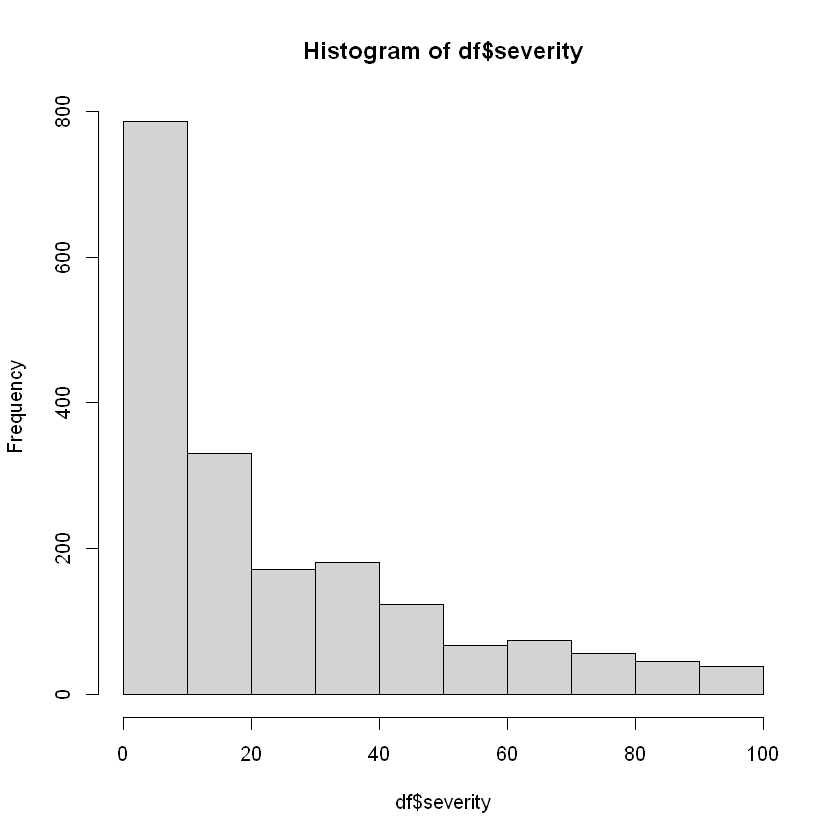

In [7]:
hist(df$severity)

In [8]:
#TODO on final model, only relevant when optimize=FALSE, 
iter_ = 2000 
chains_ = 2 
bool_optimize = TRUE #documentation FALSE: "which also mean intoverpop will be set to FALSE automatically and therefore we integrates over 
#full sampling rather than population distribution of parameters"
#number of cpu cores to use to speed up
cores_ = 5 
folds_ = 3

# Hierarchical Bayesian continuous time dynamic model - VTD & KBF severity

In [10]:
head(df[,c('ExperimentID','IsOFH', 'Is_relocated','Is_exp1','Is_exp2','Is_exp3','time2event')],2)

,ExperimentID,IsOFH,Is_relocated,Is_exp1,Is_exp2,Is_exp3,time2event
,<fct>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,Exp2,0,1,0,1,0,3.731609
2,Exp2,0,1,0,1,0,4.000000


In [11]:
############ 
#initialise what we want
name = 'unevenness_severity_trend_rs0'
#data_mvtha = subset(df,df$HAID!='created')
#data_mvtha = data_mvtha %>% select (id, MonthInstudy, severity, VTDperhour)
data_mvtha = df %>% select (id, MonthInstudy, severity, unevenness, time2event,IsOFH,Is_exp2,Is_exp3,weight)#, IsOFH, Is_relocated,Is_exp2,Is_exp3)
data_mvtha = plyr::rename(data_mvtha, c('MonthInstudy'='time',"severity"="Y1", "unevenness"="Y2"))
#data_mvtha$Y1 = sqrt(data_mvtha$Y1)

#create directory
path_save_ = file.path(path_save,name)
dir.create(path_save_)
#convert into double (integer leads to warning as Y1 and Y2 are double)
#without centered TI: we get a warning: "Uncentered TI predictors noted -- interpretability may be hindered and default priors 
#may not be appropriate"
#centering and scaling variables in the model
li_sc = c('Y1','Y2')#, 'IsOFH', 'Is_relocated','Is_exp1','Is_exp2','Is_exp3')
data_mvtha[,li_sc] = scale(data_mvtha[,li_sc]) 
#warning if we have double and integer, and as Y1 and Y2 are double, let set them all
data_mvtha[li_sc] = sapply(data_mvtha[li_sc],as.double)
data_mvtha[c('IsOFH','Is_exp2','Is_exp3')] = sapply(data_mvtha[c('IsOFH','Is_exp2','Is_exp3')],as.double)

#pearson correlation
df_ = na.omit(data_mvtha[,c('time','Y1', "Y2")])
dim(df_)
round(cor(df_[,c('time','Y1', "Y2")], method = c("pearson")), 2)
round(cor(df_[,c('time','Y1', "Y2")], method = c("spearman")), 2)
#show info
dim(data_mvtha)
head(data_mvtha,2)
summary(data_mvtha)
str(data_mvtha)

[1] 1875    3

,time,Y1,Y2
time,1.00,0.51,-0.05
Y1,0.51,1.00,0.23
Y2,-0.05,0.23,1.00


,time,Y1,Y2
time,1.00,0.62,-0.10
Y1,0.62,1.00,0.09
Y2,-0.10,0.09,1.00


[1] 2228    9

,id,time,Y1,Y2,time2event,IsOFH,Is_exp2,Is_exp3,weight
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.00,NA,NA,3.731609,0,1,0,NA
2,1,0.85,-0.931354,-0.8783412,4.000000,0,1,0,1691.7


       id             time             Y1                Y2         
 Min.   :  1.0   Min.   :0.000   Min.   :-0.9314   Min.   :-1.6495  
 1st Qu.:113.8   1st Qu.:0.820   1st Qu.:-0.8919   1st Qu.:-0.7320  
 Median :220.0   Median :3.120   Median :-0.3003   Median :-0.3123  
 Mean   :211.0   Mean   :3.511   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.:320.2   3rd Qu.:5.420   3rd Qu.: 0.5674   3rd Qu.: 0.5757  
 Max.   :372.0   Max.   :9.500   Max.   : 3.0128   Max.   : 3.0797  
                                 NA's   :353       NA's   :353      
   time2event        IsOFH           Is_exp2          Is_exp3      
 Min.   :1.500   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:3.500   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :3.833   Median :0.0000   Median :0.0000   Median :0.0000  
 Mean   :3.732   Mean   :0.1854   Mean   :0.3573   Mean   :0.2846  
 3rd Qu.:4.000   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :7.000   Max.   :1.0000   Max.  

'data.frame':	2228 obs. of  9 variables:
 $ id        : int  1 1 1 1 1 2 2 2 2 2 ...
 $ time      : num  0 0.85 3.16 5.23 7.99 0 0.85 3.16 5.23 7.99 ...
 $ Y1        : num  NA -0.931 -0.931 -0.892 -0.221 ...
 $ Y2        : num  NA -0.878 -0.902 -1.152 -1.499 ...
 $ time2event: num  3.73 4 4 4 4 ...
 $ IsOFH     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Is_exp2   : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Is_exp3   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ weight    : num  NA 1692 1722 1655 1664 ...


In [12]:
Mdiffu = matrix(c(0,0,0,0,0,0,
              0,0,0,0,0,0,
              0,0,0,0,0,0,
              0,0,0,0,0,0,
              0,0,0,0,'diffu_dynKBF','diffu_dynVTD_dynKBF',
              0,0,0,0,0,'diffu_dynVTD'), ncol = 6)
Mdiffu

0,0,0,0,0,0
0,0,0,0,0,0
0,0,0,0,0,0
0,0,0,0,0,0
0,0,0,0,diffu_dynKBF,0
0,0,0,0,diffu_dynVTD_dynKBF,diffu_dynVTD


In [13]:
#"initial covariance matrices are fixed to zero in many elements such that these new dynamics processes do not interact or 
#co-vary with the other processes in the system"
Mt0var = matrix(c('T0var_KBF','T0var_VTD_KBF','T0var_cintKBF_KBF','T0var_cintVTD_KBF',0,0,
                  0,'T0var_VTD','T0var_cintKBF_VTD','T0var_cintVTD_VTD',0,0,
                  0,0,'T0var_cintKBF','T0var_cintVTD_cintKBF',0,0,
                  0,0,0,'T0var_cintVTD',0,0,
                  0,0,0,0,0,0,
                  0,0,0,0,0,0), ncol=6)
#TODO: no initial var in the dynamics process as it set to 0 always... correct?
Mt0var

T0var_KBF,0,0,0,0,0
T0var_VTD_KBF,T0var_VTD,0,0,0,0
T0var_cintKBF_KBF,T0var_cintKBF_VTD,T0var_cintKBF,0,0,0
T0var_cintVTD_KBF,T0var_cintVTD_VTD,T0var_cintVTD_cintKBF,T0var_cintVTD,0,0
0,0,0,0,0,0
0,0,0,0,0,0


In [14]:
#The initial state and continuous intercept for each dynamical process is set to zero, to ensure that the processes capture 
#only the fluctuations and not the general trends
Mt0means = matrix(c('T0m_KBF','T0m_VTD','T0m_cintKBF','T0m_cintVTD',0,0),ncol=1)
Mt0means
MCINT = matrix(c(0,0,0,0,0,0),ncol=1)

T0m_KBF
T0m_VTD
T0m_cintKBF
T0m_cintVTD
0
0


In [15]:
#"The auto-effect of the dynamics processes is estimated, setting the speed of the fluctuations"
Mdrift = matrix(c('drift_KBF',0,0,0,0,0,
                    0,'drift_VTD',0,0,0,0,
                    1,0,0,0,0,0,
                    0,1,0,0,0,0,
                    0,0,0,0,'drift_dynKBF','drift_dynVTD_dynKBF',
                    0,0,0,0,'drift_dynKBF_dynVTD','drift_dynVTD'), ncol = 6)
Mdrift

drift_KBF,0,1,0,0,0
0,drift_VTD,0,1,0,0
0,0,0,0,0,0
0,0,0,0,0,0
0,0,0,0,drift_dynKBF,drift_dynKBF_dynVTD
0,0,0,0,drift_dynVTD_dynKBF,drift_dynVTD


In [16]:
#initialize the model with two latent each with one manifest variable
#LAMBDA: n.manifest*n.latent loading matrix relating latent to manifest variables, with latent process 1:n.latent along the 
#columns, and manifest variables 1:n.manifest in the rows.
#DIFFUSION: lower triangular n.latent*n.latent cholesky matrix of diffusion process variance and covariance (latent error / 
#dynamic innovation). "auto" freely estimates all parameters.
#stanct’ for continuous time or ’standt’ for discrete time
model_fit = ctModel(type='stanct', n.manifest=2, n.latent=6, id="id", time="time",
                    manifestNames=c('Y1','Y2'), latentNames=c('KBF','VTD','cintKBF','cintVTD','dynKBF','dynVTD'), 
                    T0MEANS=Mt0means, #initial state of dynamical process set to 0
                    T0VAR=Mt0var,
                    CINT = MCINT,
                    MANIFESTMEANS=matrix(c(0,0),ncol=1),
                    n.TIpred = 3, TIpredNames=c('Is_exp3','Is_exp2','IsOFH'),
                    LAMBDA=matrix(c(1,0, 
                                    0,1,
                                    0,0,
                                    0,0,
                                    1,0,
                                    0,1), ncol=6),  
                    DRIFT=Mdrift,
                    tipredDefault=FALSE,
                    DIFFUSION=Mdiffu) 

#we let ind. var in trend
model_fit$pars$indvarying[model_fit$pars$matrix %in% c('T0MEANS','CINT')] = TRUE
#https://discourse.mc-stan.org/t/r-package-ctsem-hierarchical-continuous-time-dynamic-models/117/14
#as we want some parameter in the system to vary by subject, we set very tight priors, as some individuals have only 3 timetamps
#model_fit$pars$sdscale[model_fit$pars$matrix %in% c('DRIFT')] = 0.05 #only for more complex like drit and manifestvar
model_fit$pars

Warning message in ctStanModel(completemodel, type = type, tipredDefault = tipredDefault):
"TI predictors included but no effects specified!"


,matrix,row,col,param,value,transform,indvarying,sdscale,Is_exp3_effect,Is_exp2_effect,IsOFH_effect
,<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<lgl>,<dbl>,<lgl>,<lgl>,<lgl>
1,T0MEANS,1,1,T0m_KBF,NA,10 * param,TRUE,1,FALSE,FALSE,FALSE
2,T0MEANS,2,1,T0m_VTD,NA,10 * param,TRUE,1,FALSE,FALSE,FALSE
3,T0MEANS,3,1,T0m_cintKBF,NA,10 * param,TRUE,1,FALSE,FALSE,FALSE
4,T0MEANS,4,1,T0m_cintVTD,NA,10 * param,TRUE,1,FALSE,FALSE,FALSE
5,T0MEANS,5,1,NA,0,NA,TRUE,NA,FALSE,FALSE,FALSE
6,T0MEANS,6,1,NA,0,NA,TRUE,NA,FALSE,FALSE,FALSE
7,LAMBDA,1,1,NA,1,NA,FALSE,NA,FALSE,FALSE,FALSE
8,LAMBDA,1,2,NA,0,NA,FALSE,NA,FALSE,FALSE,FALSE
9,LAMBDA,1,3,NA,0,NA,FALSE,NA,FALSE,FALSE,FALSE


In [17]:
#group can vary in trend
model_fit$pars$Is_exp3_effect[model_fit$pars$matrix %in% c('T0MEANS','CINT')] = TRUE
model_fit$pars$Is_exp2_effect[model_fit$pars$matrix %in% c('T0MEANS','CINT')] = TRUE
model_fit$pars$IsOFH_effect[model_fit$pars$matrix %in% c('T0MEANS','CINT')] = TRUE
#model_fit$pars$Is_exp3_effect[(model_fit$pars$matrix %in% c('CINT','T0MEANS'))&(model_fit$pars$row %in% c(1,3))] = TRUE
#check what we did
model_fit$pars[model_fit$pars$matrix %in% c('T0MEANS','CINT'),]

,matrix,row,col,param,value,transform,indvarying,sdscale,Is_exp3_effect,Is_exp2_effect,IsOFH_effect
,<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<lgl>,<dbl>,<lgl>,<lgl>,<lgl>
1,T0MEANS,1,1,T0m_KBF,NA,10 * param,TRUE,1,TRUE,TRUE,TRUE
2,T0MEANS,2,1,T0m_VTD,NA,10 * param,TRUE,1,TRUE,TRUE,TRUE
3,T0MEANS,3,1,T0m_cintKBF,NA,10 * param,TRUE,1,TRUE,TRUE,TRUE
4,T0MEANS,4,1,T0m_cintVTD,NA,10 * param,TRUE,1,TRUE,TRUE,TRUE
5,T0MEANS,5,1,NA,0,NA,TRUE,NA,TRUE,TRUE,TRUE
6,T0MEANS,6,1,NA,0,NA,TRUE,NA,TRUE,TRUE,TRUE
97,CINT,1,1,NA,0,NA,TRUE,NA,TRUE,TRUE,TRUE
98,CINT,2,1,NA,0,NA,TRUE,NA,TRUE,TRUE,TRUE
99,CINT,3,1,NA,0,NA,TRUE,NA,TRUE,TRUE,TRUE


In [18]:
unique(model_fit$pars$matrix)

[1] "T0MEANS"       "LAMBDA"        "DRIFT"         "DIFFUSION"    
[5] "MANIFESTVAR"   "MANIFESTMEANS" "CINT"          "T0VAR"

In [ ]:
set.seed(0)
#fit the model and save all results provided by the folder
#documentation: https://rdrr.io/cran/ctsem/man/ctStanFit.html : 
## iter number of iterations, half of which will be devoted to warmup by default when sampling. When optimizing, this is the 

## maximum number of iterations to allow – convergence hopefully occurs before this (default: 1000)
#intoverstates: logical indicating whether or not to integrate over latent states using a Kalman filter. Generally recommended 
#to set TRUE unless using non-gaussian measurement model. KBF is not gaussion but when set to FALSE it does not work ("NA gradient encountered at param 282" etc)

## optimize: if TRUE, use stanoptimis function for maximum a posteriori / importance sampling estimates, otherwise use the HMC 
#sampler from Stan, which is (much) slower, but generally more robust, accurate, and informative. default: TRUE

## stationary: Logical. If TRUE, T0VAR and T0MEANS input matrices are ignored, the parameters are instead fixed to long run 
#expectations. More control over this can be achieved by instead setting parameter names of T0MEANS and T0VAR matrices in the 
#input model to 'stationary', for elements that should be fixed to stationarity.
#nl = 6 #number of latent processes
#derrind = (nl*2+1):(nl*3) #dynamic error indices -- speeds computation: from ctsem paper
## nopriors: If TRUE, any priors are disabled (i.e. Si VRAI, tous les priors sont désactivés)
fit_mvtha = ctStanFit(datalong=data_mvtha, ctstanmodel=model_fit, verbose=0, cores=cores_, nopriors=FALSE, #maybe TRUE when optimize ML
                      iter=iter_, chains=chains_, optimize=bool_optimize)#, derrind) #nlcontrol=list(maxtimestep=10)
#Individual variation in T0VAR parameters not possible: as we have no variation at T0
ctsem:::ctSummarise(fit_mvtha, folder=file.path(path_save_,name), cores=cores_, ctStanPlotPost=F, nsamples=1000)
#"diag(.) had 0 or NA entries; non-finite result is doubtful": TODO: var in diffusiocov are set to 0... so maybe its normal?

Maximum a posteriori estimation requested

Setting DRIFT diagonals of 0 to approximate 0 of -1e-06

Free T0VAR parameters as well as indvarying T0MEANS -- fixing T0VAR pars to diag matrix of 1e-3

Uncentered TI predictors noted -- interpretability may be hindered and default priors may not be appropriate

Using 5/12 logical CPU cores

Doing 1st pass optimize...

Converged -- lp and par change within tolerances

Including TI predictors...

Warning message in sgd(init, fitfunc = target, parsets = parsets, nsubsets = nsubsets, :
"Gradient of parameter 26, 28, 29, 31, 32, 34, 35, 37 is exactly zero, maybe model problem?"
Warning message in sgd(init, fitfunc = target, parsets = parsets, nsubsets = nsubsets, :
"Gradient of parameter 26, 28, 29, 31, 32, 34, 35, 37 is exactly zero, maybe model problem?"
Warning message in sgd(init, fitfunc = target, parsets = parsets, nsubsets = nsubsets, :
"Gradient of parameter 26, 28, 29, 31, 32, 34, 35, 37 is exactly zero, maybe model problem?"
Warning mes

In [ ]:
summary(fit_mvtha)

In [ ]:
#### asympDIFF :  variance/covariance  of  the  latent  process
tiff(file.path(path_save_, paste0(name,'RandomDataPosterior_to_observedData.tiff')), width=400, height=400)
ctStanPostPredict(fit_mvtha, wait=FALSE) #compare randomly generated data from posterior to observed data
dev.off()

tiff(file.path(path_save_, paste0(name,'RadomDataPosteriorMeanCOv_to_observedData.tiff')), width=400, height=400)
cf = ctCheckFit(fit_mvtha) #compare mean and covariance of randomly generated data to observed cov plot(cf,wait=FALSE)
dev.off()

#calculate discrete time parameters (1,2,3 months)
df_lag = summary(fit_mvtha, timeinterval=1)
write.csv(df_lag$parmatrices, file=file.path(path_save_,paste0(name,"lag1.csv")))
df_lag = summary(fit_mvtha, timeinterval=2)
write.csv(df_lag$parmatrices, file=file.path(path_save_,paste0(name,"lag2.csv")))
df_lag = summary(fit_mvtha, timeinterval=3)
write.csv(df_lag$parmatrices, file=file.path(path_save_,paste0(name,"lag3.csv")))

#plot basics (regression kalan, priorcheck)
tiff(file.path(path_save_, paste0(name,'plotdiscretedrift_regression.tiff')), width=400, height=400)
plot(fit_mvtha,types=c('regression'), wait=FALSE)
dev.off()
tiff(file.path(path_save_, paste0(name,'plotdiscretedrift_kalman.tiff')), width=400, height=400)
plot(fit_mvtha,types=c('kalman'), wait=FALSE)
dev.off()
tiff(file.path(path_save_, paste0(name,'plotdiscretedrift_priorcheck.tiff')), width=400, height=400)
plot(fit_mvtha,types=c('priorcheck'), wait=FALSE)
dev.off()


#plot of discrete timedrift estimate all together 
tiff(file.path(path_save_, paste0(name,'plotdiscretedrift.tiff')), width=400, height=400)
ctStanDiscretePars(fit_mvtha, plot=T)
dev.off()

#check the id are correct
df_idmap = fit_mvtha$setup$idmap
head(df_idmap,2)
tail(df_idmap,2)
if (identical(df_idmap[['original']],df_idmap[['new']])==FALSE){
    print('ERROR: makes sure your id column will be the same as the one given by ctsem, just to ensure no error later on')
    stop() #couldnt find equivalent to sys.exit() in python, but that do the job as well (stop the code)
}

#print(fit_mvtha$setup$idmap[c(1,100,200,300,400), 1])
#plot 5 hens without uncertainty and width for visibility purposes
tiff(file.path(path_save_, paste0(name,'5individual_nouncertainty.tiff')), width=400, height=400)
ctKalman(fit_mvtha,subjects=c(1,100,200,300,400),plot=T,kalmanvec=c('y','ysmooth'), polygonsteps=0)
dev.off()
tiff(file.path(path_save_, paste0(name,'5otherindividual_nouncertainty.tiff')), width=400, height=400)
ctKalman(fit_mvtha,subjects=c(10,110,210,310,410),plot=T,kalmanvec=c('y','ysmooth'), polygonsteps=0)
dev.off()
tiff(file.path(path_save_, paste0(name,'5other2individual_nouncertainty.tiff')), width=400, height=400)
ctKalman(fit_mvtha,subjects=c(20,120,220,320,420),plot=T,kalmanvec=c('y','ysmooth'), polygonsteps=0)
dev.off()
#plot parameters for two hen  with polygonsteps=10 (the default) to see uncertainty
tiff(file.path(path_save_, paste0(name,'2individual_witthcertainty.tiff')), width=400, height=400)
ctKalman(fit_mvtha,subjects=c(300,400),plot=T,kalmanvec=c('y','ysmooth'), polygonsteps=10)
dev.off()
#plot parameters for two hen  with polygonsteps=10 (the default) to see uncertainty
tiff(file.path(path_save_, paste0(name,'2otherindividual_witthcertainty.tiff')), width=400, height=400)
ctKalman(fit_mvtha,subjects=c(310,410),plot=T,kalmanvec=c('y','ysmooth'), polygonsteps=10)
dev.off()
#plot parameters for two hen  with polygonsteps=10 (the default) to see uncertainty
tiff(file.path(path_save_, paste0(name,'2other2individual_witthcertainty.tiff')), width=400, height=400)
ctKalman(fit_mvtha,subjects=c(320,420),plot=T,kalmanvec=c('y','ysmooth'), polygonsteps=10)
dev.off()

#extract estimates of individual parameters, taking into account any covariates and random effects
#output an nsamples by nsubjects by nparams array.
indpars = ctStanSubjectPars(fit_mvtha, cores=cores_, nsamples="all")[1,,]
ind.data = data.frame(indpars)
ind.data$id = fit_mvtha$setup$idmap$original #or new, its the same
head(ind.data,3)
dim(ind.data)
write.csv(ind.data, file=file.path(path_save_,paste0(name,"HenIDParameters.csv")))

In [ ]:
ctKalman(fit_mvtha,subjects=c(300,400),plot=T,kalmanvec=c('y','yprior'), polygonsteps=10)

In [ ]:
#TODO: standardized resiudals (ctstankalman with stderror=TRUE)

In [ ]:
df_res = ctKalman(fit_mvtha,subjects=fit_mvtha$setup$idmap[,1],plot=F)#,kalmanvec=c('y','yprior'))
dim(df_res)
write.csv(df_res, file=file.path(path_save_,paste0(name,"df_res_yprior.csv")))

In [ ]:
#compare randomly generated data from posterior to observed data
ctStanPostPredict(fit_mvtha, wait=FALSE)

In [ ]:
x = ctStanDiscretePars(fit_mvtha, subjects='popmean')
#ctStanDiscreteParsPlot(x, indices='CR',facets='Subject')
write.csv(as.data.frame(x), file=file.path(path_save_,paste0(name,"ctStanDiscretePars.csv")))

In [ ]:
#K fold cross validation for ctStanFit objects
#"folds Number of cross validation splits to use – 3 folds implies that the model is re-fit 3 times, each time to a data set 
#with 1/3 of the observations randomly removed"
loores = ctLOO(fit_mvtha, folds = folds_, cores = cores_, subjectwise=TRUE)
for (i in folds_){
    df_fold = loores$foldrows[as.character(i-1)]
    write.csv(df_fold, file=file.path(path_save_,paste0(name,'df_',i,"fold.csv")))}
df_foldpars = loores$foldpars
write.csv(df_foldpars, file=file.path(path_save_,paste0(name,"df_foldpars.csv")))
df_sampleloglikrow = data.frame('out'=loores$outsampleLogLikRow,'in'=c(loores$insampleLogLikRow))
write.csv(df_sampleloglikrow, file=file.path(path_save_,paste0(name,"df_sampleloglikrow.csv")))
df_resloo = data.frame('insampleLogLik' = loores$insampleLogLik,
           'outsampleLogLik' = loores$outsampleLogLik,
           'outsampleLogLik' = loores$insampleRowwiseEntropy,
           'outsampleRowwiseEntropy' = loores$outsampleRowwiseEntropy,
           'insampleSubjectwiseEntropy' = loores$insampleSubjectwiseEntropy,
           'outsampleSubjectwiseEntropy' = loores$outsampleSubjectwiseEntropy,
           'insampleRowwiseLogLikSD' = loores$insampleRowwiseLogLikSD,
           'outsampleRowwiseLogLikSD' = loores$outsampleRowwiseLogLikSD,
           'insampleSubjectwiseLogLikSD' = loores$insampleSubjectwiseLogLikSD,
           'outsampleSubjectwiseLogLikSD' = loores$outsampleSubjectwiseLogLikSD)
write.csv(df_resloo, file=file.path(path_save_,paste0(name,"df_resloo.csv")))
##
fit_mvtha$cv =ctLOO(fit_mvtha, folds = folds_, cores = cores_, subjectwise=TRUE)
save(fit_mvtha,file=file.path(path_save_,'fit_mvtha.rda'))